# **Import module dan library**

In [ ]:
%pwd

'/content'

In [ ]:
# grader-required-cell
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import regularizers

#### Creat directori dataset

In [ ]:
#membuat direktori
!mkdir "Dataset"

In [ ]:
%cd "/content"

/content


#### **Download dataset**

In [ ]:
#Dataset Padi
!wget https://github.com/callmezamm/pruduct_based/raw/main/DATASET/rice_leaf_diseases.zip
# !gdown "1zjwVsrDaf9Xi_e2zrmCRc-uozv430qeB" -O/content/Dataset/rice_leaf_diseases.zip

Downloading...
From: https://drive.google.com/uc?id=1zjwVsrDaf9Xi_e2zrmCRc-uozv430qeB
To: /content/Dataset/rice_leaf_diseases.zip
100% 309M/309M [00:07<00:00, 43.5MB/s]


In [ ]:
#Dataset Jagunng


In [ ]:
#Dataset Tomat


In [ ]:
#Masuk ke dir dataset
%cd "./Dataset/"

/content/Dataset


#### Unzip dataset

In [ ]:
# Unzip the dataset
local_zip = './rice_leaf_diseases.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rice_leaf_diseases')
zip_ref.close()

In [ ]:
#jangan dijalankan!!!! (untuk menghapus semua data dalam folder rice_leaf_diseasess)
# !rm -r Dataset

#### Atur lokasi dan cek total dataset

In [ ]:
# atur lokasi
dir_dataset = "./rice_leaf_diseases/" # Mendefinisikan path dataset

# total semua data
train_dir = "/content/Dataset/rice_leaf_diseases/train"
val_dir = "/content/Dataset/rice_leaf_diseases/validation"

# ================= banyak data train ===========================
train_class = sorted(os.listdir(train_dir))
dict_train = {}

for class_name in train_class:
  class_dir = os.path.join(train_dir, class_name)
  val_count = len(os.listdir(class_dir))
  key = class_name
  value = val_count
  dict_train[key] = value

train_count = sum([len(files) for r, d, files in os.walk(train_dir)])

print (f'''
Banyak data train Bacterial Leaf Blight :  {dict_train["bacterial_leaf_blight"]} data
Banyak data train Brown Spit            :  {dict_train["brown_spot"]} data
Banyak data train healthy               :  {dict_train["healthy"]} data
Banyak data train Leaf_blast            :  {dict_train["leaf_blast"]} data
Banyak data train Leaf Scald            :  {dict_train["leaf_scald"]} data
Banyak data Narrow brown spot           :  {dict_train["narrow_brown_spot"]} data
                                          ---------
Total data Train                        : {train_count} data''')

# ================= Banyak data Val ============================
val_class = sorted(os.listdir(val_dir))
dict_val = {}

for class_name in val_class:
  class_dir = os.path.join(val_dir, class_name)
  val_count = len(os.listdir(class_dir))
  key = class_name
  value = val_count
  dict_val[key] = value

val_count = sum([len(files) for r, d, files in os.walk(val_dir)])

print (f'''
Banyak data train Bacterial Leaf Blight :  {dict_val["bacterial_leaf_blight"]} data
Banyak data train Brown Spit            :  {dict_val["brown_spot"]} data
Banyak data train healthy               :  {dict_val["healthy"]} data
Banyak data train Leaf_blast            :  {dict_val["leaf_blast"]} data
Banyak data train Leaf Scald            :  {dict_val["leaf_scald"]} data
Banyak data Narrow brown spot           :  {dict_val["narrow_brown_spot"]} data
                                          ---------
Total data Validasi                     : {val_count} data''')

total_data = train_count + val_count
print (f'''
Total seluruh data                      : {total_data} data''')



Banyak data train Bacterial Leaf Blight :  350 data
Banyak data train Brown Spit            :  350 data
Banyak data train healthy               :  350 data
Banyak data train Leaf_blast            :  350 data
Banyak data train Leaf Scald            :  350 data
Banyak data Narrow brown spot           :  350 data
                                          ---------
Total data Train                        : 2100 data

Banyak data train Bacterial Leaf Blight :  88 data
Banyak data train Brown Spit            :  88 data
Banyak data train healthy               :  88 data
Banyak data train Leaf_blast            :  88 data
Banyak data train Leaf Scald            :  88 data
Banyak data Narrow brown spot           :  88 data
                                          ---------
Total data Validasi                     : 528 data

Total seluruh data                      : 2628 data


#### Cek labels dir

In [ ]:
# Cek Index Labels
print(os.listdir(train_dir))

['bacterial_leaf_blight', 'brown_spot', 'leaf_scald', 'healthy', 'narrow_brown_spot', 'leaf_blast']


In [ ]:
print (dict_train)
print (dict_val)

{'bacterial_leaf_blight': 350, 'brown_spot': 350, 'healthy': 350, 'leaf_blast': 350, 'leaf_scald': 350, 'narrow_brown_spot': 350}
{'bacterial_leaf_blight': 88, 'brown_spot': 88, 'healthy': 88, 'leaf_blast': 88, 'leaf_scald': 88, 'narrow_brown_spot': 88}


In [ ]:
# menggabungkan total data dari validasi dan train seluruh kelas
dict_data = {}
for key in dict_train:
  dict_data[key] = dict_train.get(key, 0) + dict_val.get(key, 0)

for key in dict_val:
    if key not in dict_train:
        dict_data[key] = dict_val[key]

# dict_data

#### Visualisasi dataset

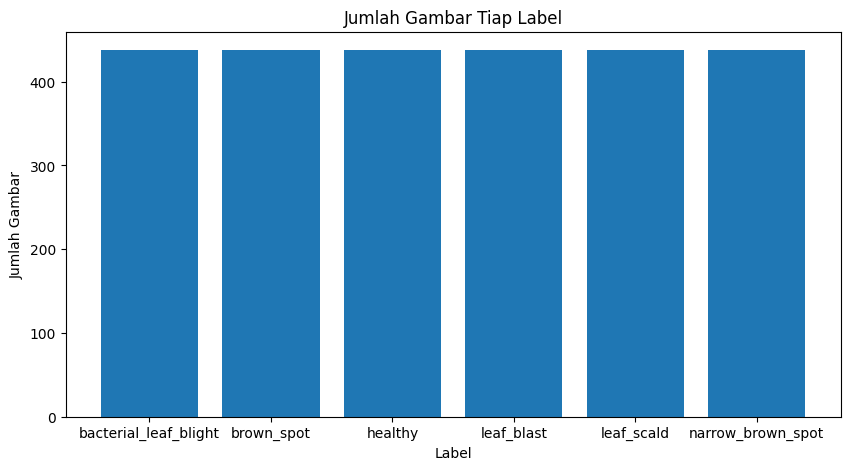

In [ ]:
# Visualisasi jumlah gambar tiap kelas

fig = plt.figure(figsize=(10, 5))
plt.bar(dict_data.keys(), dict_data.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');
     


#### Implementasi image data generator

In [ ]:
# split data 20% untuk validasi   
# Mengatur lebar dan tinggi gambar
img_width = 224
img_height = 224
channels = 3
batch_size = 16

Train_datagen = ImageDataGenerator(rescale=1./255)

Validation_datagen = ImageDataGenerator(rescale=1./255)

# Train dan Validation generator  dengan mode categorical
Train_generator = Train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = True
)

Validation_generator = Validation_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = False
)

Found 2100 images belonging to 6 classes.
Found 528 images belonging to 6 classes.


#### Model

##### CNN Model

In [ ]:
##### Pembuatan model

cnn_model = tf.keras.models.Sequential(
    [    #  inception_model,
     tf.keras.layers.Conv2D(128, (3,3), activation='relu',input_shape=(img_width, img_height,3)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     # Droupout
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
     tf.keras.layers.Dense(6, activation='softmax')
    ]
)

#### Compile model

In [ ]:
# Penggunaan Optimizer 'Adam' dengan learning rate 0.00146
Optimizer = tf.keras.optimizers.Adam(1e-5)
cnn_model.compile(optimizer=Optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

#### Callbacks

In [ ]:
# create callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] >= 0.9 and logs['val_accuracy'] >= 0.85 and (logs['accuracy'] - logs['val_accuracy'] < 1):
            print("\nReached accuracy and testing accuracy corresponding so cancelling training!")
            self.model.stop_training = True

#### Training model

In [ ]:
callbacks = myCallback()
# Train the model
# Note that this may take some time.
cnn_history = cnn_model.fit(Train_generator,
                    epochs=50,
                    verbose=1,
                    callbacks = myCallback(),
                    validation_steps = 3,
                    validation_data=Validation_generator)

Epoch 1/50
132/132 [==============================] - 87s 542ms/step - loss: 2.3974 - accuracy: 0.3890 - val_loss: 1.5780 - val_accuracy: 0.7500
Epoch 2/50
132/132 [==============================] - 70s 528ms/step - loss: 1.6436 - accuracy: 0.5510 - val_loss: 1.5693 - val_accuracy: 0.5833
Epoch 3/50
132/132 [==============================] - 71s 533ms/step - loss: 1.3761 - accuracy: 0.6167 - val_loss: 1.0181 - val_accuracy: 0.7917
Epoch 4/50
132/132 [==============================] - 71s 539ms/step - loss: 1.1976 - accuracy: 0.6743 - val_loss: 1.2722 - val_accuracy: 0.6667
Epoch 5/50
132/132 [==============================] - 69s 518ms/step - loss: 1.0969 - accuracy: 0.7000 - val_loss: 1.0186 - val_accuracy: 0.7917
Epoch 6/50
132/132 [==============================] - 70s 532ms/step - loss: 0.9868 - accuracy: 0.7386 - val_loss: 0.9484 - val_accuracy: 0.8333
Epoch 7/50
132/132 [==============================] - 69s 525ms/step - loss: 0.9495 - accuracy: 0.7462 - val_loss: 0.7880 - val_ac

#### Plot Akurasi model

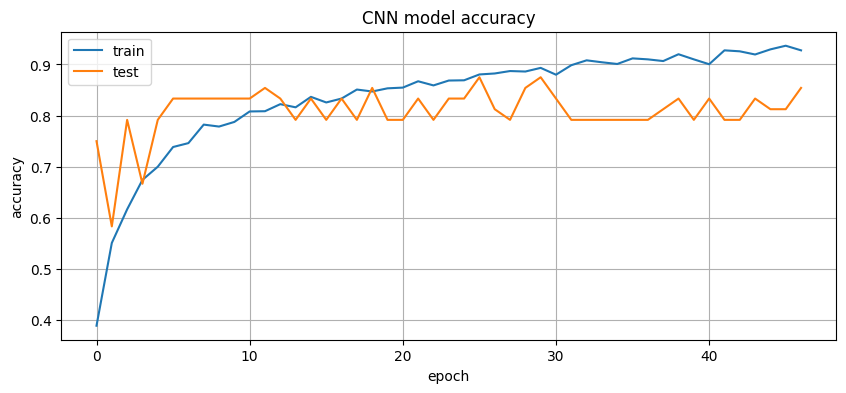

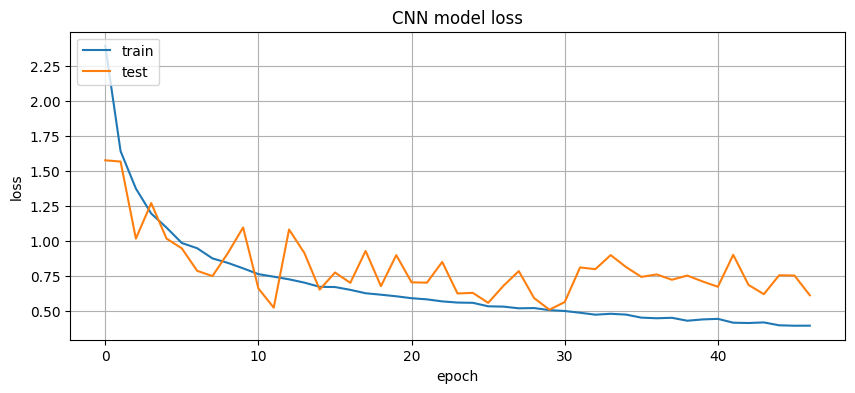

In [ ]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

#### Testing

In [ ]:
Train_generator.class_indices

{'bacterial_leaf_blight': 0,
 'brown_spot': 1,
 'healthy': 2,
 'leaf_blast': 3,
 'leaf_scald': 4,
 'narrow_brown_spot': 5}

1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 1. 0. 0.]]
leaf blast
Akurasi : 100.0


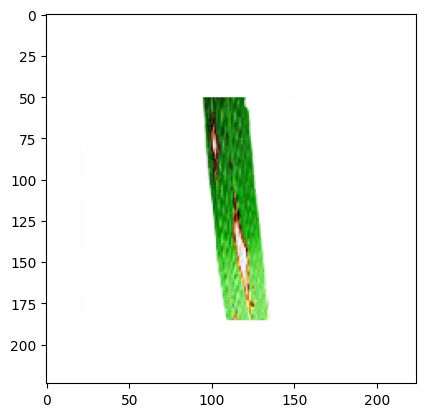

In [ ]:
from tensorflow.keras.preprocessing import image

import numpy as np
img_source = "/content/Dataset/rice_leaf_diseases/train/leaf_blast/leaf_blast (148).jpg"
image_load = image.load_img(img_source, target_size = (img_width,img_height))
imgplot = plt.imshow(image_load)
x = image.img_to_array(image_load)
x = np.expand_dims(x, axis=0)
probs = vgg_model.predict(x)

# convert percent 
probs = np.clip(probs,0,1)
percent = probs * 100

# print softmax probabilities
high = np.argmax(probs)
print (probs)
if high == 0:
  print ("bacterial leaf blight")
  print(f'''Akurasi : {np.round(percent[0,0],2)}''')
elif high == 1:
  print("brown_spot")
  print(f'''Akurasi : {np.round(percent[0,1],2)}''')
elif high == 2:
  print("healthy")
  print(f'''Akurasi : {np.round(percent[0,2],2)}''')
elif high == 3:
  print("leaf blast")
  print(f'''Akurasi : {np.round(percent[0,3],2)}''')
elif high == 4:
  print("leaf scald")
  print(f'''Akurasi : {np.round(percent[0,4],2)}''')
else:
  print("narrow brown spot")
  print(f'''Akurasi : {np.round(percent[0,5],2)}''')